# Chapter 06: __Lists__

---

In [82]:
# DO NOT DELETE THIS. MAY BE REQUIRED FOR DISPLAYING IMAGES AND/OR VIDEOS.
#
from IPython.display import display, Image, SVG, Math, YouTubeVideo

----

When solving problems, frequently we have the need to collect data and store in a single data structure so that we can go back to that data and analyze it or present it in some way.

#### We need to REMEMBER!

In fact, we have done so already with the `str` data type.

In [2]:
def convert_lowercase( in_str ):
    """
    This function is very much UNNECESSARY, because the str.lower() function
    will convert the entire string into uppercase. We could also use the
    ordinal value of each character to convert it to uppercase, but let's just
    keep things simple to illustrate the point of collecting multiple points
    of data in a single collection, such as a string.
    """
    out_str = ""
    for cur_chr in in_str:
        out_str += cur_chr.lower()
    return out_str

In [3]:
convert_lowercase( "A Happy BIRD" )

'a happy bird'

In [4]:
"A Happy BIRD".lower()

'a happy bird'

### 6.1.1 Creating Lists

Lists are *mutable* data structures.

Lists are *sequences*. That is, we can index into them with integer keys, and we can *slice* them.

In Python, we have several data types that work as _sequences_. Besides strings, we have lists and tuples. However, tuples are essentially _immutable_ lists.

All of these three data types are _indexable_, and, due to their common properties, they work pretty much the same way.

So how do we use lists, or why do we need lists?

Suppose that we read a list of numbers from an input file and we need to compute the average of these numbers. 

We do not necessarily need to store all these values anywhere in order to be able to compute their average.

So, let's read these values first:

In [6]:
datafile = open( "data/numbers-01.txt" )

for cur_value in datafile:
    print( cur_value.rstrip(), end=" " )
    
datafile.close() # Must explicitly close the file we opened above

12 3 50 23 15 2 34 19 23 45 

Let us compute the average of these values by modifying our for-loop:

In [8]:
with open( "data/numbers-01.txt" ) as datafile:
    #
    total = 0
    count = 0
    
    for cur_value in datafile:
        total += float( cur_value ) # DO NOT FORGET TO CONVERT!
        count += 1

    average = total / count
    print( f"--- The average of {count} values is {average}. Total={total}" )

--- The average of 10 values is 22.6. Total=226.0


What if wanted to compute the *median* and mode for these values on top of computing the mean/average? 

What if we wanted to run additional analysis on this data?

Trying to do all this without storing all these values somewhere would be impractical.

We can use the `list` data type to collect this data on its way from the input file and then use it as many times as needed to compute whatever we wish using that data.

The simplest way to collect data into a `list` is to use the `list.append()` method. This is similar to using _concatenation_ with strings, except that we add a separate element to the list each time.

In [17]:
with open( "data/numbers-01.txt" ) as datafile:
    #
    values = [] # INITIALIZE to an EMPTY LIST
    
    for cur_value in datafile:
        #
        values.append( float( cur_value ) ) # DO NOT FORGET TO CONVERT!
        print( f"--- values: {values}" )

    average = sum( values ) / len( values )
    print( f"--- Values read from the input file:\n\t{values}" )
    print( f"--- The average of {count} values is {average}. Total={total}" )

--- values: [12.0]
--- values: [12.0, 3.0]
--- values: [12.0, 3.0, 50.0]
--- values: [12.0, 3.0, 50.0, 23.0]
--- values: [12.0, 3.0, 50.0, 23.0, 15.0]
--- values: [12.0, 3.0, 50.0, 23.0, 15.0, 2.0]
--- values: [12.0, 3.0, 50.0, 23.0, 15.0, 2.0, 34.0]
--- values: [12.0, 3.0, 50.0, 23.0, 15.0, 2.0, 34.0, 19.0]
--- values: [12.0, 3.0, 50.0, 23.0, 15.0, 2.0, 34.0, 19.0, 23.0]
--- values: [12.0, 3.0, 50.0, 23.0, 15.0, 2.0, 34.0, 19.0, 23.0, 45.0]
--- Values read from the input file:
	[12.0, 3.0, 50.0, 23.0, 15.0, 2.0, 34.0, 19.0, 23.0, 45.0]
--- The average of 10 values is 22.6. Total=226.0


In [11]:
values

[12.0, 3.0, 50.0, 23.0, 15.0, 2.0, 34.0, 19.0, 23.0, 45.0]

**QUESTION:** What if we had some empty lines in the input file?

In [31]:
%%file data/numbers-01-with-empty-lines.txt
12 
3 
50 

22.5 
15 
2 
33.5 

             

19 

   
23 
    
45

Overwriting data/numbers-01-with-empty-lines.txt


Obviously we will have to check for empty lines, because ...

In [32]:
float( "" )

ValueError: could not convert string to float: ''

In [33]:
float( "  " )

ValueError: could not convert string to float: ''

In [43]:
with open( "data/numbers-01-with-empty-lines.txt" ) as datafile:
    #
    values = [] # INITIALIZE to an EMPTY LIST
    
    for cur_value in datafile:
        #
        cur_value = cur_value.strip()
        
        if cur_value == '':
            print( "### Ignoring empty line ..." )
        else:
            values.append( float( cur_value ) ) # DO NOT FORGET TO CONVERT!
            ##values.append( cur_value )
            print( f"--- values: {values}" )

    average = sum( values ) / len( values )
    print( f"\n--- Values read from the input file:\n\t{values}" )
    print( f"--- The average of {count} values is {average}. Total={sum( values )}" )

--- values: [12.0]
--- values: [12.0, 3.0]
--- values: [12.0, 3.0, 50.0]
### Ignoring empty line ...
--- values: [12.0, 3.0, 50.0, 22.5]
--- values: [12.0, 3.0, 50.0, 22.5, 15.0]
--- values: [12.0, 3.0, 50.0, 22.5, 15.0, 2.0]
--- values: [12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5]
### Ignoring empty line ...
### Ignoring empty line ...
### Ignoring empty line ...
--- values: [12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5, 19.0]
### Ignoring empty line ...
### Ignoring empty line ...
--- values: [12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5, 19.0, 23.0]
### Ignoring empty line ...
--- values: [12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5, 19.0, 23.0, 45.0]

--- Values read from the input file:
	[12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5, 19.0, 23.0, 45.0]
--- The average of 10 values is 22.5. Total=225.0


A much shorter way of doing the above:

In [44]:
with open( "data/numbers-01-with-empty-lines.txt" ) as datafile:
    #
    values = [float( cur_value ) for cur_value in datafile if cur_value.strip()]
    average = sum( values ) / len( values )
    
    print( f"--- values: {values}" )
    print( f"\n--- Values read from the input file:\n\t{values}" )
    print( f"--- The average of {count} values is {average}. Total={sum( values )}" )

--- values: [12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5, 19.0, 23.0, 45.0]

--- Values read from the input file:
	[12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5, 19.0, 23.0, 45.0]
--- The average of 10 values is 22.5. Total=225.0


### 6.1.2 Accessing List Elements

Lists, just like all _sequence_ types are _indexable_, which means that we can _read_ each element from them using integer-valued indices in the range 

     [0 .. len( list ) - 1]
     
or, using *negative indices*, we can do the same with indices in the range 

     [-len( list ) .. -1]

Do you remember this from strings? It's the same thing!

Using the `values` list we created above, let's see how this works:

In [45]:
values

[12.0, 3.0, 50.0, 22.5, 15.0, 2.0, 33.5, 19.0, 23.0, 45.0]

How many items/values do we have in `values`?

In [46]:
len( values )

10

This means that the last value, `45.0`, will be at index `9`, while the first item is always at index `0`.

In [47]:
values[0]

12.0

In [48]:
values[9]

45.0

Using negative indices, we can get the same like this:

In [49]:
values[-10]

12.0

In [51]:
values[-1] # No need to know the last possible positive index

45.0

### 6.1.3 Traversing Lists

Three ways:
1. Loop using indices and access each item with the current index (*index-based*)
     - Should never be used&mdash;*non-Pythonic!*
2. Loop over individual values (*value-based*)
     - Should be used when indices are not needed
3. Loop over both indices and individual values&mdash;using `enumerate()` (*combined*)
     - Should be preferred to Method 1&mdash;*Pythonic!*!

__(1) Loop using indices__

- Usually there is no need to use this method, since we have a better way of doing the same thing. See _Method (3)_ below.

In [52]:
for i in range( len( values ) ): # [0 .. len( values ) - 1]
    #
    cur_value = values[i]
    print( f"--- values[{i}] = {cur_value:4.1f}" )

--- values[0] = 12.0
--- values[1] =  3.0
--- values[2] = 50.0
--- values[3] = 22.5
--- values[4] = 15.0
--- values[5] =  2.0
--- values[6] = 33.5
--- values[7] = 19.0
--- values[8] = 23.0
--- values[9] = 45.0


In [53]:
i = 0 # MUST INITIALIZE MY INDEX!

while i < len( values ): # [0 .. len( values ) - 1]
    #
    cur_value = values[i]
    print( f"--- values[{i}] = {cur_value:4.1f}" )
    i += 1 # MUST REMEMEBR TO INCREMENT MY INDEX

--- values[0] = 12.0
--- values[1] =  3.0
--- values[2] = 50.0
--- values[3] = 22.5
--- values[4] = 15.0
--- values[5] =  2.0
--- values[6] = 33.5
--- values[7] = 19.0
--- values[8] = 23.0
--- values[9] = 45.0


__(2) Loop over values__

- Use this method when we do not have a need for the indices of items stored in a list.

In [54]:
for cur_val in values:
    #
    print( f"--- Current value: {cur_val:4.1f}" )

--- Current value: 12.0
--- Current value:  3.0
--- Current value: 50.0
--- Current value: 22.5
--- Current value: 15.0
--- Current value:  2.0
--- Current value: 33.5
--- Current value: 19.0
--- Current value: 23.0
--- Current value: 45.0


__(3) Loop over both indices and values__&mdash;using `enumerate()`

- Use this method when we need the indices in addition to the values.
- Prefer this method over _Method (1)_.

First, let's look into how the `enumerate()` function works:

In [22]:
print( enumerate.__doc__ )

Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...


As you see, `enumerate()` returns a _list_ of two-tuples for each elements of the input list/iterable, where the first value is the _index_ and the second is the value.

In [55]:
enum = list( enumerate( values ) )
enum

[(0, 12.0),
 (1, 3.0),
 (2, 50.0),
 (3, 22.5),
 (4, 15.0),
 (5, 2.0),
 (6, 33.5),
 (7, 19.0),
 (8, 23.0),
 (9, 45.0)]

In [56]:
for item_twotuple in enumerate( values ):
    #
    print( f"--- values[{item_twotuple[0]}] = {item_twotuple[1]:4.1f}" )

--- values[0] = 12.0
--- values[1] =  3.0
--- values[2] = 50.0
--- values[3] = 22.5
--- values[4] = 15.0
--- values[5] =  2.0
--- values[6] = 33.5
--- values[7] = 19.0
--- values[8] = 23.0
--- values[9] = 45.0


Remember _tuple assignment_?

Tuple assignment relieves us of having the access the index and value using indexing as we did right above.

In [57]:
for cur_index, cur_value in enumerate( values ):
    #
    print( f"--- values[{cur_index}] = {cur_value:4.1f}" )

--- values[0] = 12.0
--- values[1] =  3.0
--- values[2] = 50.0
--- values[3] = 22.5
--- values[4] = 15.0
--- values[5] =  2.0
--- values[6] = 33.5
--- values[7] = 19.0
--- values[8] = 23.0
--- values[9] = 45.0


### 6.1.4 List References

Suppose we do the following:


In [67]:
scores = [10, 9, 7, 4, 5] # NAME = OBJECT
values = scores # Copying list reference (Figure 1) NAME = NAME

#### A *names* contains the pyhysical *address* of where the actual value referred by that name resides in memory. 

**Corollary:** Names do **not** store values directly. They only store *memory addresses*, which are used to locate values!

1. Value `[10, 9, 7, 4, 5]` gets stored in memory somewhere, say, at address `A`.
2. `scores` is created, and Python stores memory address `A` in it
3. When `values = scores`, Python copies the memory address in `scores` to `values`. So now `values` also stores memory address `A`, just like `scores`, which is what it actualy stores.

<img src='figures/pfe3-figure-002.svg' width=700/>

___Figure 1___ reflects this first assignment, which actually does not create a _copy_ of the `scores` list but simply creates a new _reference_ or name that holds the same _address_ to the list data as does `scores`.

We can modify the list through either of the variables. Let us try it via `values` and modify the fourth value:

In [59]:
values

[10, 9, 7, 4, 5]

In [60]:
values[3] = 12
values

[10, 9, 7, 12, 5]

Since we created a reference but not a copy of the original list, this modification will also be seen from the other name, `scores`.

In [61]:
scores

[10, 9, 7, 12, 5]

In [62]:
id( values ), id( scores )

(140395940777472, 140395940777472)

This means both `values` and `scores` point to the same memory location, where the list resides.

#### __Aliasing__

Remember that we had briefly talked about _aliasing_ in [__Chapter 2__](chapter-02.ipynb).

An _alias_ is another _name_ or _reference_ to a given _value_.

We can establish if two or more names refer to the same object in memory using the `id()` function.

There is a complementary `is` operator that tells us whether two names refer to a physically identical location in memory.

In [63]:
id( scores ), id( values )

(140395940777472, 140395940777472)

If we wish to check if `scores` and `values` both refer to the same exact memory location, we do this:

In [64]:
scores is values

True

In [65]:
values is scores

True

So we really do not have to do the following to establish physical identicality!

In [66]:
id( values ) == id( scores )

True

We see that both ID values are identical, and, due to this reason, the `is` operator tells us that both names refer to the same exact value in memory. This is similar to you having two friends, named Joe and Mary, who have your home address. If someone wishes to visit you at home, that person can ask either of your friends for your home address. 

Suppose that you called a painter who lost your address but knows both of your friends. Suppose that the painter asked Joe for your home address. After he gets your address, the painter travels to your house and paints your front wall to blue.

Then suppose your other friend, Jane knows Mary and asks her for your home address. After getting your address, Jane travels to your house. Obviously, Jane will see your front wall painted blue, even though she reached your home via a different person or _name_/_reference_.

This is the essence of _aliasing_, as we demonstrated above.

When we assign an object or value to a name

    L = [1, 2, 3]
    
on the left-hand-side of the assignment we have a _name_, and, on the right-hand-side we have an object/value.

    NAME = OBJECT
    
When we have aliasing, both sides of the assignment have names

    M = L
    
So this is a case of

    NAME = NAME

---

Let's try aliasing names for monolithic values such as integers. That is, an integer variable can only hold one single integer value, unlike a string, list, or tuple.

In [68]:
a = 99 # NAME = OBJECT
b = a  # NAME = NAME (Aliasing)

Now `a` and `b` should _refer_ to the same value.

In [69]:
a

99

In [70]:
b

99

Let's do our `id()` check.

In [71]:
id( a ), id( b )

(94122976610688, 94122976610688)

Let's do our `is` operator check.

In [72]:
a is b

True

This means that names `a` and `b` both refer to the same exact physical object, an integer, in memory.

So, instead of doing

    id( a ) == id( b )
    
to check for physical identicality, it's cleaner to do

    a is b
    
    

So,  now, what happens when we modify `b`?

In [73]:
b += 1

In [74]:
a, b

(99, 100)

In [75]:
id( a ), id( b )

(94122976610688, 94122976610720)

In [76]:
b is a

False

Since the ID values are different past the modification, the `is` operator naturally returns False. So names `a` and `b` are no longer aliases for the same value.

Finally, let us try one more twist.

In [77]:
lst_a = [1, 2, 3]
lst_b = [1, 2, 3]

In [78]:
id( lst_a ), id( lst_b )

(140395940282304, 140395939500416)

Visually, we can easily discern that `lst_a` and `lst_b` are _equal_.

In [79]:
lst_a == lst_b # VALUE EQUALITY CHECK

True

However, do they occupy the same exact memory location? Let us use `is` to find out:

In [80]:
lst_a is lst_b # PHYSICAL LOCATION CHECK

False

So, no! Even if two values are equal value-wise, they need not be physically identical.

Therefore, you should distinguish between two names being equal in terms of referring to the same exact address or location in memory physically and two names having identical values separately.

__CASE 1:__ When two names, say, `x` and `y` are true aliases for an object/value, then

    x is y
and
      
    x == y
will both return `True`.

__CASE 2:__ When two names happen to refer to values that are identical but physically different, then

    x is y
will return `False`, while
    
    x == y
returns `True`.

----

#### Indexing Items in Lists

Subscripted index references work identically to that in strings.

Again negative indices work identically in lists.

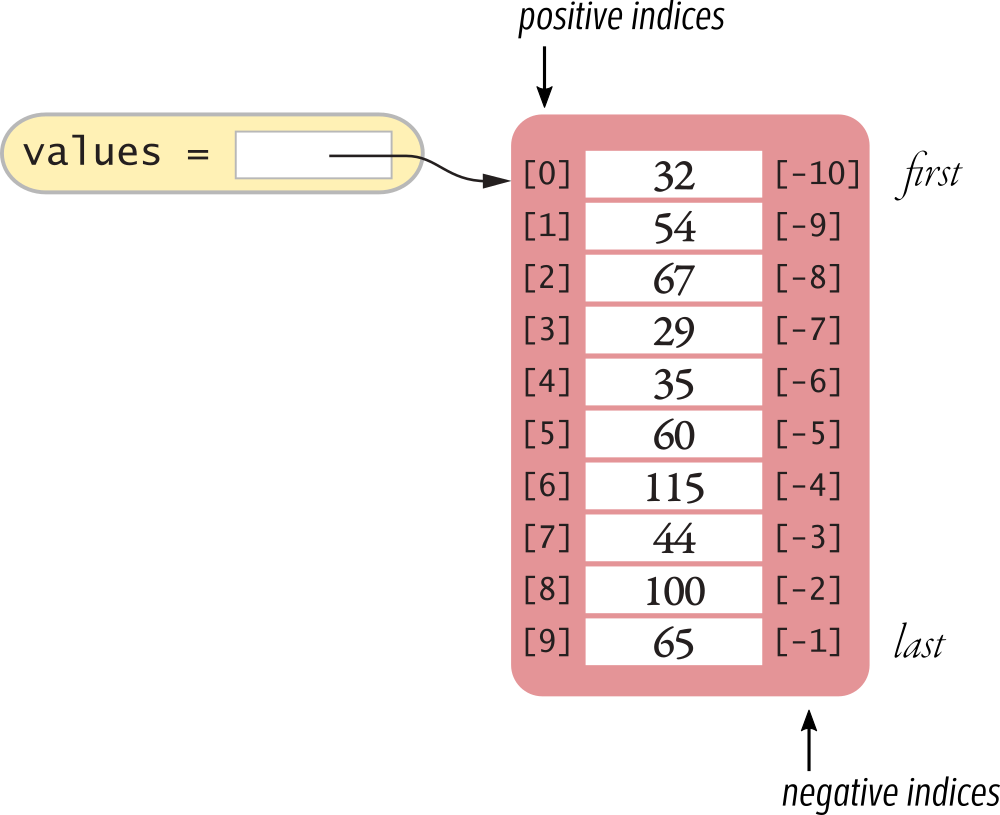

In [83]:
Image( 'figures/png/reverse-subscripts.png', width=300 )

#### Index ranges

For *sequence*, S

- Positive indices: `[0 .. len( S ) - 1]`
    
- Negative indices: `[-len( S ) .. -1]`

Therefore, for practical purposes,

- `S[0]` is always the first element of `S`
- `S[-1]` is always the last element of `S`

### 6.2 List Operations

#### 6.2.1 Appending Elements: `list.append( item )`

Step <font color="#0055ee" size=+1>➊</font>:

In [84]:
friends = []

friends

[]

Step <font color="#0055ee" size=+1>➋</font>:

In [85]:
friends.append( "Harry" )

friends

['Harry']

Step  <font color="#0055ee" size=+1>➌</font>:

In [86]:
friends.append( "Emily" )
friends.append( "Bob" )
friends.append( "Cari" )

In [87]:
friends

['Harry', 'Emily', 'Bob', 'Cari']

Here's how your textbook depicts these three steps:

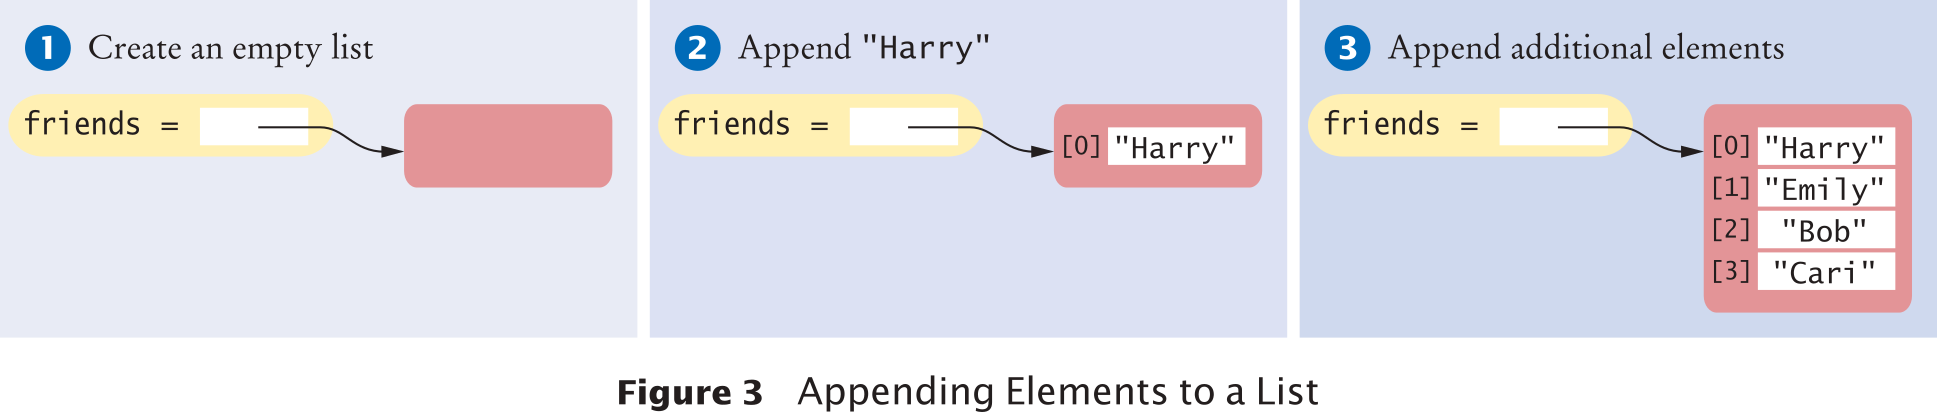

In [88]:
Image( 'figures/png/pfe3-figure-003.png', width=800 )

#### 6.2.2 Inserting an Element: `list.insert( index, item )`

In [90]:
friends

['Harry', 'Emily', 'Bob', 'Cari']

In [91]:
friends.insert( 2, 'Cindy' )

In [92]:
friends

['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']

The item previously at index `2`, `Bob` got shifted to the right to the fourth position, and, `Cindy` became the element at index `2`.

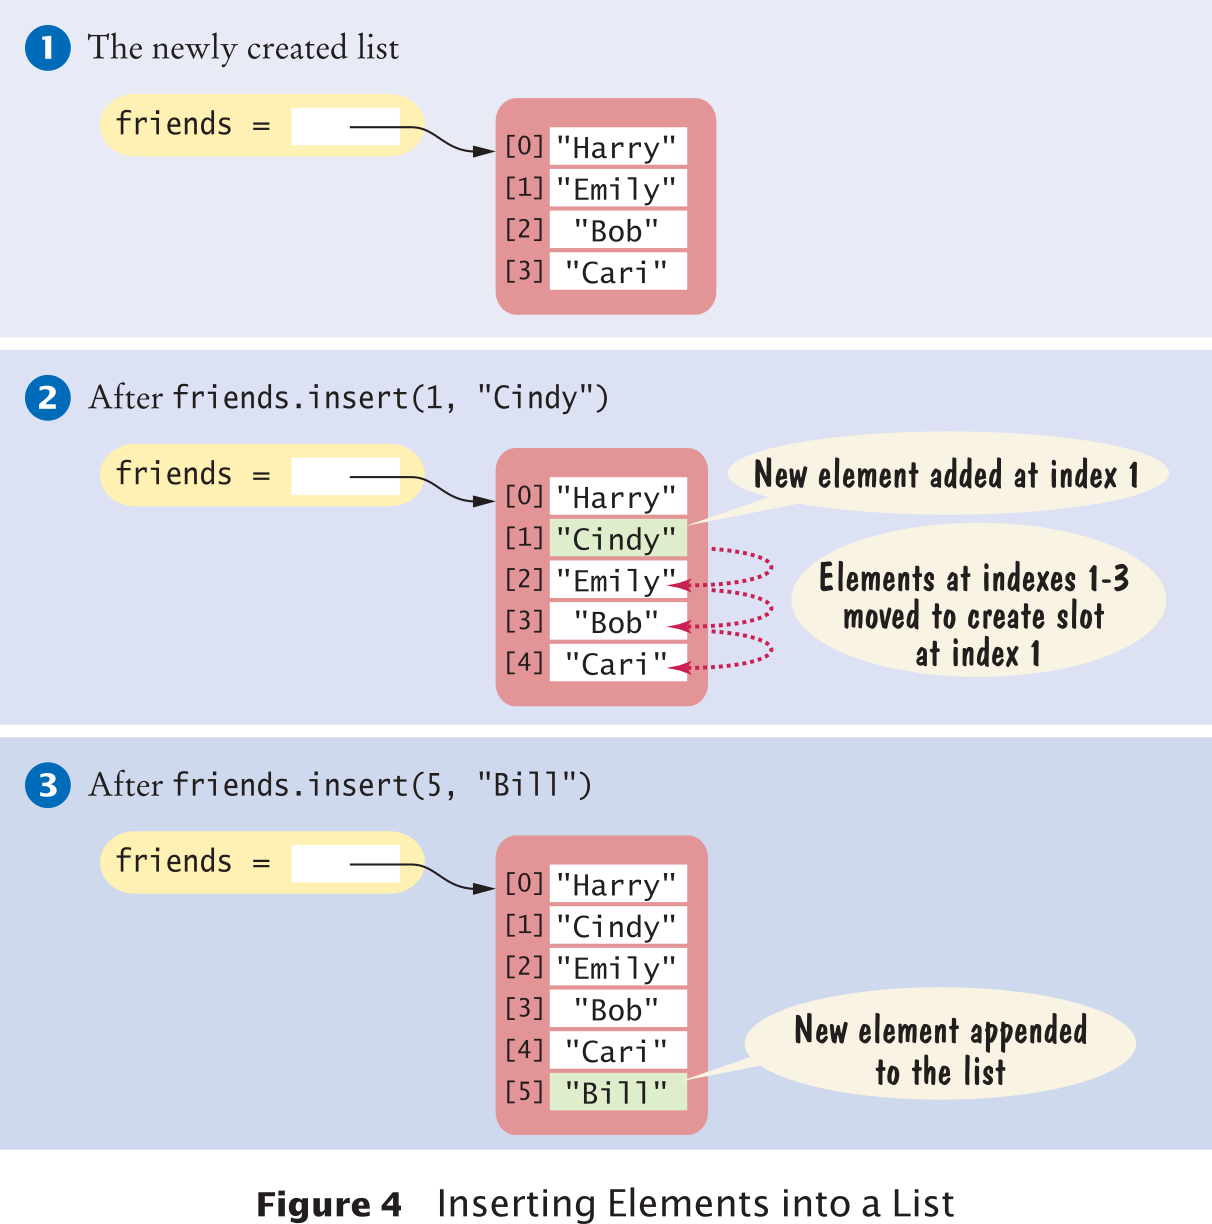

In [93]:
Image( 'figures/png/pfe3-figure-004.png', width=550 )

___NOTE:___: We could use _negative_ indices anywhere indices are used!

In [94]:
friends

['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']

In [95]:
friends.insert( -1, "William" )

In [96]:
friends

['Harry', 'Emily', 'Cindy', 'Bob', 'William', 'Cari']

This looks a bit confusing, but it's really not, because we have to apply the same procedure as described in ___Figure 4___ above:
    
- All values starting at index -1 will be shifted to the right
- The new value will be inserted at the old -1 position
    

#### Example 1: Using positive indices

```
friends <-- ['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']

friends.insert( 3, "Joe" )
```

1. SHIFT all items starting at index 3 to the RIGHT by one position

2. INSERT the new item at the old 3 position


APPLY Step 1:

```
friends <-- ['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']
             0        1        2        3      4
             
friends <-- ['Harry', 'Emily', 'Cindy', **BLANK**, 'Bob', 'Cari']
             0        1        2        3          4      5
```

APPLY Step 2:

```
friends <-- ['Harry', 'Emily', 'Cindy', 'Joe', 'Bob', 'Cari']
             0        1        2        3      4      5
```

In [97]:
friends = ['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']

friends.insert( 3, "Joe" )

friends

['Harry', 'Emily', 'Cindy', 'Joe', 'Bob', 'Cari']

#### Example 2: Using negative indices

```
friends <-- ['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']

friends.insert( -1, "William" )
```

1. SHIFT all items starting at index -1 to the RIGHT by one position

2. INSERT the new item at the old -1 position


APPLY Step 1:

```
friends <-- ['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']
             0        1        2        3      4
            -5       -4       -3       -2     -1
             
friends <-- ['Harry', 'Emily', 'Cindy', 'Bob', BLANK, 'Cari']
             0        1        2        3      4      5
            -6       -5       -4       -3     -2     -1
```

APPLY Step 2:

```
friends <-- ['Harry', 'Emily', 'Cindy', 'Bob', 'William', 'Cari']
             0        1        2        3      4          5
            -6       -5       -4       -3     -2         -1
             
```

We can observe that `friends.insert( -1, 'William' )` is equivalent to `friends.insert( 4, 'William' )`.

Now we can realize that the index value specified will be "reserved" for the new item that just got inserted.


In [98]:
friends = ['Harry', 'Emily', 'Cindy', 'Bob', 'Cari']

friends.insert( -1, "William" )

friends

['Harry', 'Emily', 'Cindy', 'Bob', 'William', 'Cari']

---

In [99]:
len( friends )

6

So we can say the above using positive indices like this:

- All values starting at index 5 will be shifted to the right
- The new value will be inserted at position 5

Therefore, after insertion, the _new_ item always occupies the index specified to the `list.insert()` method!

In [100]:
M = [2, 4, 6, 8, 10]

In [101]:
M.insert( -1, 99 )

In [102]:
M

[2, 4, 6, 8, 99, 10]

In [103]:
M.insert( 6, 55 )

In [44]:
M

[2, 4, 6, 8, 99, 10, 55]

In [104]:
M.insert( len( M ), 66 )
M

[2, 4, 6, 8, 99, 10, 55, 66]

In [105]:
M.insert( 22, 0 ) # We do NOT have 23 items, so what happens?

In [107]:
M

[2, 4, 6, 8, 99, 10, 55, 66, 0]

So Python does not issue any error messages when we do so!

<div style="border: 1px solid #080; color: #080; padding: 5px;">

    Always think of crazy examples!

</div>

#### 6.2.3 Finding an Element: `list.index( item )`

In [108]:
friends

['Harry', 'Emily', 'Cindy', 'Bob', 'William', 'Cari']

In [109]:
"William" in friends

True

In [110]:
if "William" in friends:
    print( "William is a friend" )

William is a friend


In [111]:
friends.index( "William" )

4

So, `William` is the fifth item in `friends`.

In [112]:
friends.index( "Joe" )

ValueError: 'Joe' is not in list

Oh, no! `Joe` is __not__ a friend! So we got an error.

To ensure that we will never end up with errors when we look for items in lists, we should guard our `list.index()` call with an if-statement using the `in` operator.

In [113]:
if "Joe" in friends:
    joe_idx = friends.index( "Joe" )
    print( f"Joe is a friend at index {joe_idx}." )
else:
    print( "I do not know Joe." )

I do not know Joe.


In [117]:
if "William" in friends:
    bill_idx = friends.index( "William" )
    print( f"William is a friend at index {bill_idx}." )
else:
    print( "I do not know William." )

William is a friend at index 4.


#### 6.2.4 Removing an Element: `list.remove( item )` and `list.pop( index )`

We can remove items from a list using either `list.remove()` or `list.pop()` depending on what we need to do.

In [118]:
friends

['Harry', 'Emily', 'Cindy', 'Bob', 'William', 'Cari']

In [119]:
friends.remove( 'Cindy' )

In [120]:
friends

['Harry', 'Emily', 'Bob', 'William', 'Cari']

In [121]:
friends.remove( 'Ken' )

ValueError: list.remove(x): x not in list

Before removing an element, you should guard the `list.remove()` call with an if-statement.

In [122]:
if 'Ken' in friends:
    friends.remove( 'Ken' )
else:
    print( "Ken is not among my friends." )

Ken is not among my friends.


In [123]:
friends = ["Harry", "Cindy", "Emily", "Bob", "Cari", "Bill"]

In [124]:
friends.remove( "Cindy" )

In [127]:
#Image( 'figures/png/pfe3-figure-005.png', width=450, height=1000 )

<img src="figures/png/pfe3-figure-005.png" width=450/> 

In [128]:
friends

['Harry', 'Emily', 'Bob', 'Cari', 'Bill']

In [129]:
friends.pop( 2 ) # Removes the 3rd item, Bob, and returns the removed value as well

'Bob'

In [130]:
friends

['Harry', 'Emily', 'Cari', 'Bill']

What if we have duplicate items in a list?

In [134]:
friends = ["Harry", "Cindy", "Emily", "Bob", "Cindy", "Cari", "Bill", "Mark", "Cindy"]

In [135]:
friends.remove( "Cindy" )

In [136]:
friends

['Harry', 'Emily', 'Bob', 'Cindy', 'Cari', 'Bill', 'Mark', 'Cindy']

So, `list.remove()` only removes the _first_ occurrence of the specified item.

Now that we know about functions, let us contemplate a couple of ways to remove all copies of a given value.

Say we have the following list, and we want to remove all `3`s from this list.

In [137]:
lst = [1, 2, 3, 4, 3, 2, 2, 3, 3, 4, 5, 3, 1, 3]

In [138]:
count_3 = lst.count( 3 )
count_3

6

So we have six copies of value `3`.

Let us  implement this idea straightforwardly.

In [148]:
def remove_all_v1( target_item, lst ):
    """
    """
    for cur_elem in lst:
        if cur_elem == target_item:
            lst.remove( cur_elem ) # MODIFYING (removal/insertion) a list we are looping through is a No-No!
    return lst

In [140]:
lst = [1, 2, 3, 4, 3, 2, 2, 3, 3, 4, 5, 3, 1, 3]

In [141]:
remove_all_v1( 3, lst )

[1, 2, 4, 2, 2, 4, 5, 1, 3]

Obviously, even though the algorithm seemed to work on paper, <font color="#a00">__the code did NOT work!__</font> We still have the `3` at the end remaining.

Right now, we will not get into why this code does not work. However, you should __never modify__ the sequence inside a for-loop you are using to iterate over that sequence!!!

Let's try another method using a while-loop.

In [142]:
def remove_all_v2( target_item, lst ):
    """
    """
    num_items_to_be_removed = lst.count( target_item )
    count_removed = 0 # How many target_items we have removed so far
    while count_removed < num_items_to_be_removed:
        lst.remove( target_item )
        count_removed += 1
    return lst

In [143]:
lst = [1, 2, 3, 4, 3, 2, 2, 3, 3, 4, 5, 3, 1, 3]

In [144]:
remove_all_v2( 3, lst )

[1, 2, 4, 2, 2, 4, 5, 1]

It worked now. Note that we are not using a for-loop to iterate over our list, `lst`. So we are OK here.

We could do the same thing using a for-loop as well.

In [145]:
def remove_all_v3( target_item, lst ):
    """
    """
    num_items_to_be_removed = lst.count( target_item )
    for _ in range( num_items_to_be_removed ): # Loop as many times as we have the target item
        lst.remove( target_item )
    return lst

In [146]:
lst = [1, 2, 3, 4, 3, 2, 2, 3, 3, 4, 5, 3, 1, 3]

In [147]:
remove_all_v3( 3, lst )

[1, 2, 4, 2, 2, 4, 5, 1]

It worked again. Even though we are using a for-loop, we are __not__ using that for loop to iterate through the items in `lst`, because we do not have a statement like `for e in lst`. Instead we are iterating over the range of values `[0 .. (num_items - 1)]`.

### HERE 20210416

### 6.2.5 Concatenation and Replication

To _join_ two lists, we can use the `+` operator on two lists.

In [1]:
lst_a = [1, 2, 3, 4, 2, 5]
lst_b = [5, 6, 7]

lst_a + lst_b

[1, 2, 3, 4, 2, 5, 5, 6, 7]

If we wish to store the resulting list, we can do this:

In [2]:
lst_c = lst_a + lst_b

In [3]:
lst_c

[1, 2, 3, 4, 2, 5, 5, 6, 7]

Lists `lst_a` and `lst_b` will remain intact.

In [4]:
lst_a

[1, 2, 3, 4, 2, 5]

In [5]:
lst_b

[5, 6, 7]

---

We can replicate lists by using the `*` operator followed by an integer value. The items inside that outermost list will be duplicated as many times as the integer value.

The general format is

    list_specification * n
    
Examples:    

In [6]:
[0] * 5

[0, 0, 0, 0, 0]

In [7]:
[[1, 2, 3]] * 4

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

What was inside the outermost list in the last example above? The list `[1, 2, 3]`. So that list got replicated four times, and these replications were put in a new list. So consider this:

In [8]:
[1, 2, 3] * 4

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [9]:
[1, 2, 3] * 0

[]

### 6.2.6 Equality Testing: `==` / `!=`

If two lists look visually identical, then they are equal. This means that each corresponding element is identical. We use the `==` operator to check for equality, and we use the `!=` operator to check the opposite.

It goes without saying that if two names are _aliases_, meaning that they refer to the same exact object in memory, then, by definition, they will be equal.

In [10]:
lst_x = [1, 2, 3]
lst_y = [1, 2, 3]

In [11]:
lst_x == lst_y

True

In [12]:
lst_z = lst_x # Create an alias

In [13]:
lst_y == lst_z

True

In [14]:
lst_x == lst_z

True

In [15]:
lst_t = [2, 3]

In [16]:
lst_x == lst_t

False

In [18]:
lst_x != lst_t

True

In [20]:
[1, 2, 3] == [3, 2, 1]

False

In [22]:
set( [1, 2, 3] ) == set( [3, 2, 1] )

True

### About the concept of equality

Remember that we have two types of *equality*, if you will:

1. Visual equality/Value-based equality (operator: `==`)

2. Equality based on occupying a particular memory location/Memory equality (operator: `is`)

So, as we mentioned before, memory equality will automatically mean visual/value equality!

However, the reverse is not necessarily true! That is, whatever is visually equal is not necessarily memory equal at the same time.

### 6.2.7 Sum, Maximum, Minimum, and Sorting: `sum()`, `max()`, `min()`, `sort()`, `sorted()`

In [24]:
sum( [1, 4, 9, 16] ) # List

30

In [25]:
sum( (1, 4, 9, 16) ) # Tuple

30

In [30]:
sum( 1, 4, 9, 16 ) # Tuple

TypeError: sum() takes at most 2 arguments (4 given)

In [26]:
max( [1, 16, 9, 4, -3, 56, 35] ) # Using an iterable

56

In [27]:
max( 1, 16, 9, 4, -3, 56, 35 ) # Passing all values individually

56

In [28]:
min( [1, 16, 9, 4, -3, 56, 35] )

-3

In [29]:
min( 1, 16, 9, 4, -3, 56, 35 )

-3

The `max()` and `min()` functions can accept an iterable type or the items can be passed directly. The `sum()` function, on the other hand, only accepts an iterable. It cannot used like this:

    sum( 1, 2, 3, 4, 5 )

We can also ask of _minimum_ or _maximum_ about a set/list of strings as well.

In [31]:
min( "Fred", "Ann", "Sue", "Annabell" )

'Ann'

In [32]:
"Ann" < "Annabell"

True

Why?

How do we compare strings? This is the same thing.

### Sorting lists

Next, let's sort.

In [33]:
ints = [1, 16, 9, 4, -3, 56, 35]

In [34]:
ints.sort()

In [35]:
ints # Values are sorted in ASCENDING ORDER!

[-3, 1, 4, 9, 16, 35, 56]

In [36]:
ints.sort( reverse=True ) # Values are sorted in DESCENDING ORDER!

In [37]:
ints

[56, 35, 16, 9, 4, 1, -3]

In [38]:
import random

In [39]:
random.shuffle( ints )

In [40]:
ints

[-3, 9, 16, 35, 56, 1, 4]

In [41]:
sorted( ints )

[-3, 1, 4, 9, 16, 35, 56]

The `sorted()` function does not _destructively_ modify the list we pass to it. A new sorted copy is returned.

In [42]:
ints

[-3, 9, 16, 35, 56, 1, 4]

What if we had the following list to sort.

In [49]:
vals = ["1", "9", "2", "5", "7", "6", "10", "3", "4", "8", "400", "100", "15", "20"]

In [50]:
sorted( vals )

['1', '10', '100', '15', '2', '20', '3', '4', '400', '5', '6', '7', '8', '9']

***QUESTION:*** Did `sorted()` make a mistake, or did it do what it was supposed to do?

The `sorted()` function will not do the job!

Actually, it worked, but it just did not do what we hoped or expected. 

Instead of "understanding" the numeric values in the strings provided, it carried out ALPHABETIC SORTING!

We have a magical sorting function called `natsorted()` in the `natsort` module.

In [51]:
from natsort import natsorted

In [52]:
natsorted( vals )

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '15', '20', '100', '400']

That is, `natsorted` understands numeric values even if they are hidden inside strings. Therefore, when `sorted()` falls short, think of using `natsorted()`. It may do the job.

Read more about `natsorted`:

> https://natsort.readthedocs.io/en/master/examples.html

In [54]:
sorted( "Near East University" )

[' ',
 ' ',
 'E',
 'N',
 'U',
 'a',
 'a',
 'e',
 'e',
 'i',
 'i',
 'n',
 'r',
 'r',
 's',
 's',
 't',
 't',
 'v',
 'y']

In [53]:
help( sorted )

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



We can control how sorting operates using the `key` and `reverse` keyword arguments. We will not cover the `key` keyword argument now. The `reverse` keyword argument controls the order of the sorting. When `False`, values will be sorted in _ascending_ order. In ascending order sorted sequences, the _smallest_ value is first. When `True`, the values will be sorted in _descending_ order, where the _largest_ value will be first.

In [55]:
natsorted( vals, reverse=True ) # Descending order

['400', '100', '20', '15', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1']

#### 6.2.8 Copying Lists

In [56]:
a = [1, 2, 3, 4]  # NAME = OBJECT
b = a             # NAME = NAME (ALIAS)

In [58]:
a is b # Memory equality

True

In [59]:
id( a ), id( b )

(139752536611904, 139752536611904)

In [60]:
c = list( b ) # Create a new copy of the list

In [61]:
a == b

True

In [62]:
c == b

True

In [63]:
c is b

False

In [64]:
a is b

True

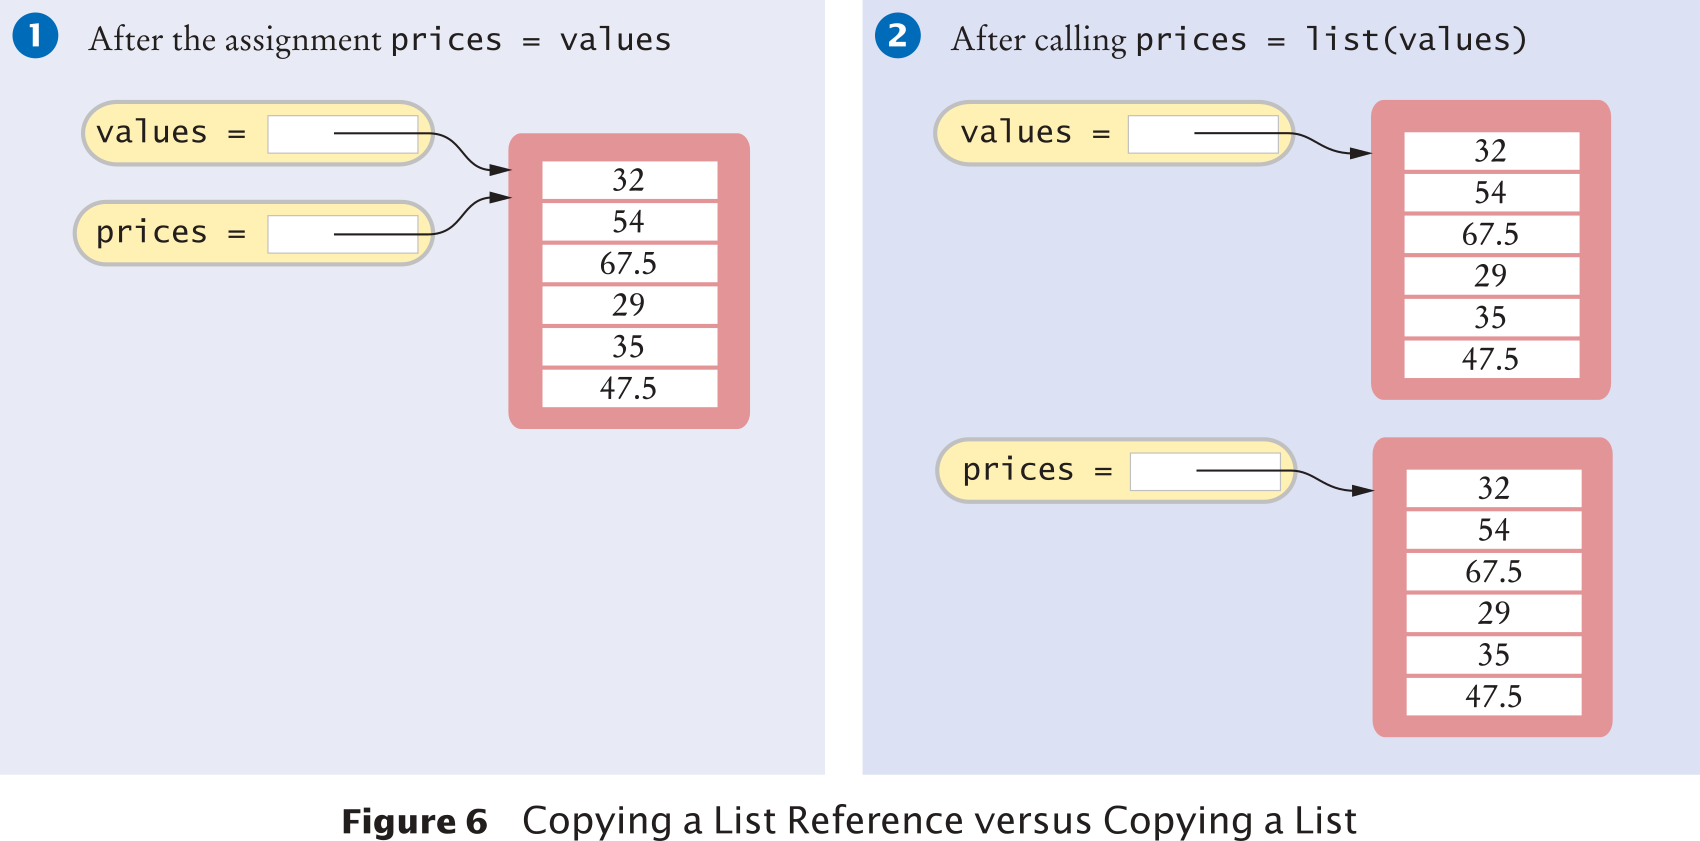

In [3]:
Image( 'figures/png/pfe3-figure-006.png', width=700 )

---